1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

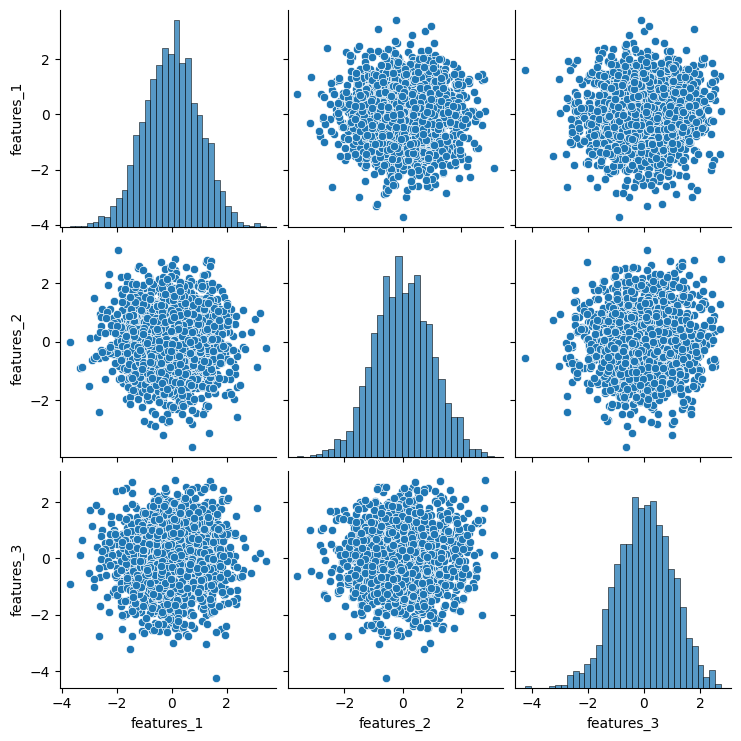

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "regression_generated.csv"
df_regression = pd.read_csv(file_name)

#all possible combinations
sns.pairplot(df_regression[['features_1', 'features_2', 'features_3']])
plt.show()

# The scatter plots help visualize the relationships between the features. If points follow a pattern, there might be correlation.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

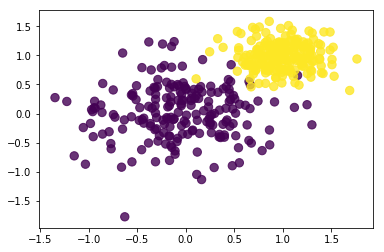

In [16]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

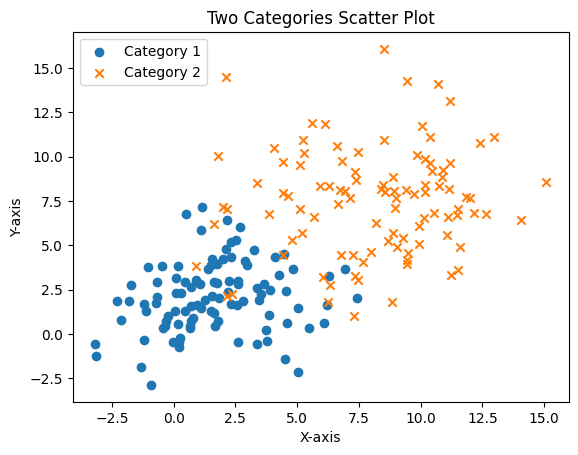

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_dataset(mean1, std1, mean2, std2, size_per_category):
    category1 = np.random.normal(mean1, std1, size=(size_per_category, 2))
    category2 = np.random.normal(mean2, std2, size=(size_per_category, 2))
    return category1, category2

#2D dataset
mean1, std1 = (2, 2)
mean2, std2 = (8, 3)
size_per_category = 100
category1, category2 = generate_2d_dataset(mean1, std1, mean2, std2, size_per_category)

# Scatter plot
plt.scatter(category1[:, 0], category1[:, 1], label='Category 1', marker='o')
plt.scatter(category2[:, 0], category2[:, 1], label='Category 2', marker='x')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Two Categories Scatter Plot')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot


Dataset: {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


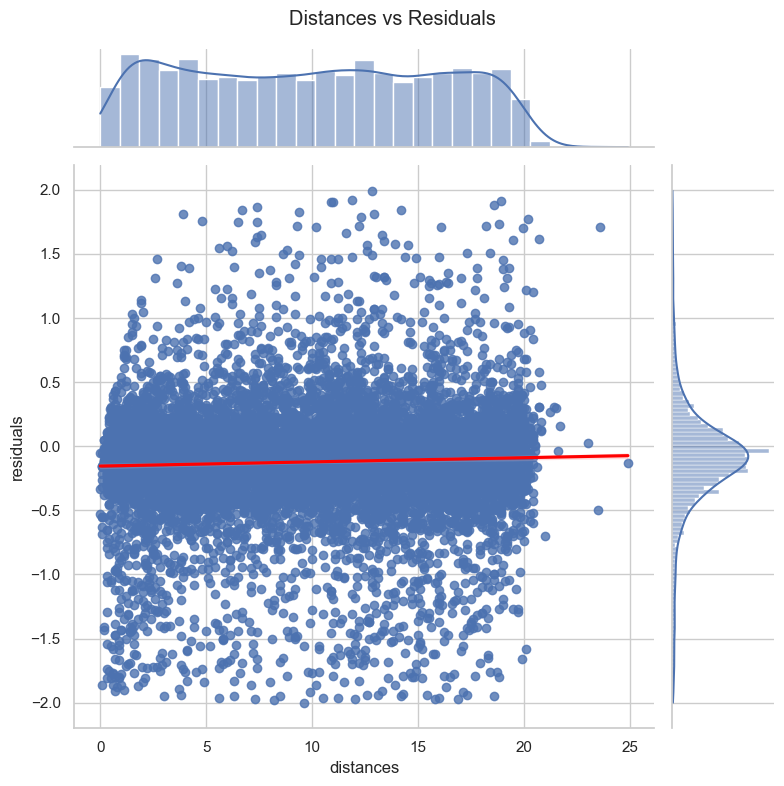

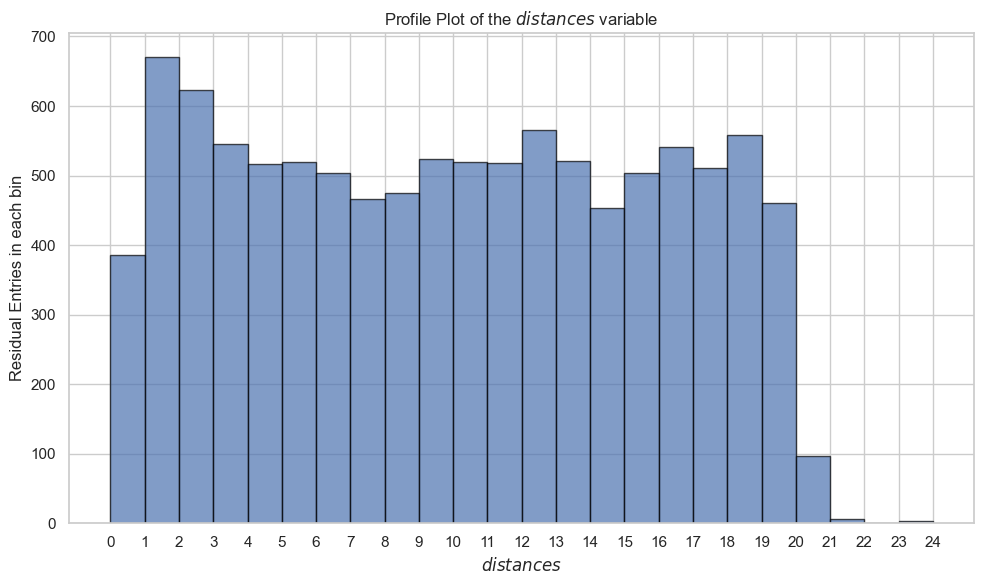

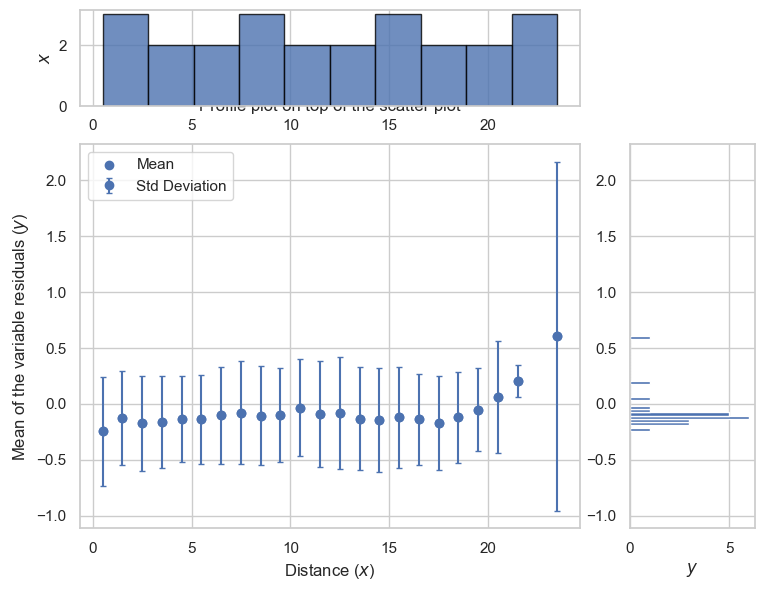

In [19]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'residuals_261.pkl'

with open(file_path, 'rb') as file:
    data_dict = pickle.load(file)

print(f'\nDataset: {data_dict}')

df_residuals = pd.DataFrame(data_dict.flatten()[0])

df_filtered = df_residuals[np.abs(df_residuals['residuals']) < 2]

sns.set(style="whitegrid")
joint_plot = sns.jointplot(x="distances", y="residuals", data=df_filtered, height=8, kind='reg', joint_kws={'line_kws': {'color': 'red'}})
joint_plot.fig.suptitle("Distances vs Residuals")
joint_plot.fig.tight_layout()

profile_fig = plt.figure(figsize=(10, 6))
x_values = df_filtered['distances']
hist, bins, _ = plt.hist(x_values, bins=np.arange(x_values.min(), x_values.max()), alpha=0.7, edgecolor='black')

ax = profile_fig.axes[0]
ax.set_title('Profile Plot of the $distances$ variable')
ax.set_xlabel('$distances$')
ax.set_ylabel('Residual Entries in each bin')
plt.xticks(np.arange(x_values.min(), x_values.max(), 1.0))
profile_fig.tight_layout()

bin_centers = (bins[1:] + bins[:-1]) / 2
x = bin_centers
residuals_slices = [df_filtered.loc[(df_filtered['distances'] > i) & (df_filtered['distances'] < i + 1)] for i in range(len(bins) - 1)]
y_mean = np.array([i['residuals'].mean() for i in residuals_slices])
err_y = np.array([i['residuals'].std() for i in residuals_slices])

profile_fig2 = plt.figure(figsize=(8, 6))
ax = profile_fig2.add_gridspec(top=0.75, right=0.75).subplots()
ax.set_title('Profile plot on top of the scatter plot')
ax.set_xlabel('Distance ($x$)')
ax.set_ylabel('Mean of the variable residuals ($y$)')

ax_histx = ax.inset_axes([0, 1.1, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.1, 0, 0.25, 1], sharey=ax)

ax.scatter(x, y_mean)
ax.errorbar(x, y_mean, yerr=err_y, fmt='o', capsize=2)

ax_histx.hist(x, bins=10, alpha=0.8, edgecolor='black')
ax_histy.hist(y_mean, bins=30, orientation='horizontal')

ax_histx.set_ylabel('$x$')
ax_histy.set_xlabel('$y$')

ax.legend(('Mean', 'Std Deviation'), loc='upper left')

plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


C:\Users\msi\AppData\Local\Temp\ipykernel_15964\1607873506.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_gauss = np.sum(norm.pdf(np.linspace(x.min(), x.max(), 1000), x, std) for x in x)


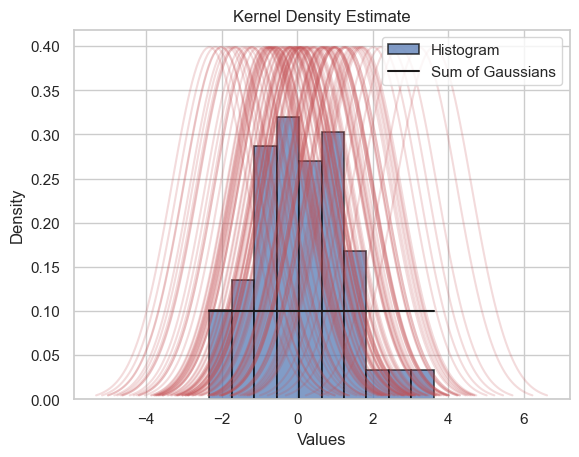

In [20]:
from scipy.stats import norm
from scipy.integrate import trapz

mean, std = 0, 1
N = 100
x = np.random.normal(mean, std, N)

plt.hist(x, bins=10, density=True, alpha=0.7, edgecolor='black', linewidth=1.2, label='Histogram')

for value in x:
    gauss_x = np.linspace(value - 3 * std, value + 3 * std, 100)
    gauss_y = norm.pdf(gauss_x, value, std)
    plt.plot(gauss_x, gauss_y, 'r-', alpha=0.2)

sum_gauss = np.sum(norm.pdf(np.linspace(x.min(), x.max(), 1000), x, std) for x in x)
normalized_sum_gauss = sum_gauss / trapz(sum_gauss, dx=0.01)
plt.plot(np.linspace(x.min(), x.max(), 1000), normalized_sum_gauss, 'k-', label='Sum of Gaussians')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate')
plt.legend()
plt.show()